<a href="https://colab.research.google.com/github/MikeNsiah10/DLTFpT/blob/master/iannwtf_homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import the necessary libraries

In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds


#load the datasets

In [13]:
#load the datasets
(train_set,test_set),set_info=tfds.load('mnist', split=['train','test'],as_supervised=True,with_info=True)
#print(set_info)

In [14]:
#get the number of training and testing images
train_images= set_info.splits['train'].num_examples
test_images= set_info.splits['test'].num_examples
print(f'training images:{train_images}, testing images:{test_images}')

training images:60000, testing images:10000


In [15]:
# Take one example from the training set
#return a tuple of image,label
example = next(iter(train_set))
# Access the 'image' feature
image = example[0]
# Get the range of pixel values and shape of image
pixel_value_range = (tf.reduce_max(image))
print(f', shape of image:{image.shape},pixel value range:{pixel_value_range}')

, shape of image:(28, 28, 1),pixel value range:255


#visualize the data

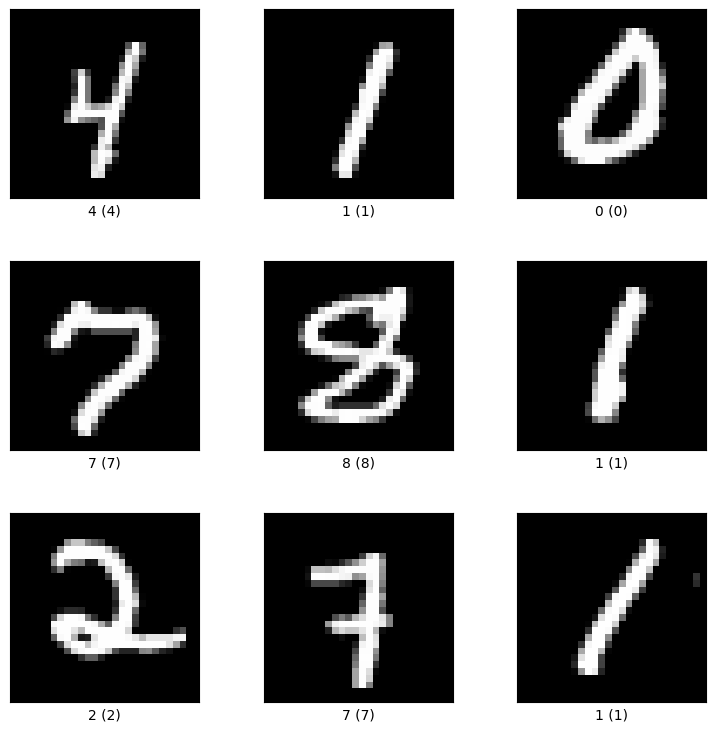

In [16]:
figure = tfds.show_examples(train_set, set_info)


#Preprocess the data

In [17]:
#function to preprocess the data
num_examples=len(list(train_set))
def pre_process(images):
  #convert the dtype to float32
  images=images.map(lambda img,target:(tf.cast(img,tf.float32),target))
  #flattten the images to a 1D array
  images=images.map(lambda img,target:(tf.reshape(img,(-1,)),target))
  #normalize the images between the values [-1,1]
  images=images.map(lambda img,target:((img/128)-1.,target))
  # Ensure target values are cast to integer type
  images = images.map(lambda img, target: (img, tf.cast(target, tf.int64)))
  #one-hot encode the labels
  images=images.map(lambda img,target:(img,tf.one_hot(target,depth=10)))
  #shuffle the data with the number of training examples
  images=images.shuffle(num_examples)
  #choose a batch size
  images=images.batch(64)
  #prefetch by dynamically tuning the buffersize
  images=images.prefetch(tf.data.AUTOTUNE)
  #return preprocessed data
  return images

train_set=train_set.apply(pre_process)
test_set=test_set.apply(pre_process)







#Build keras model

In [18]:
class MyModel(tf.keras.Model):

  def __init__(self):
    #inherit the parent class
    super().__init__()
    #define the layers
    self.dense1 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(256, activation=tf.nn.relu)
    self.dense3 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    #feedforward the inputs
  def call(self,inputs):
    x=self.dense1(inputs)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

#create an object of the class model
model=MyModel()




#Training the network

In [19]:
# training function to train the network
def train_model(num_epochs, model, train_ds, test_ds, loss_func, optimizer):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies= []

    for epoch in range(num_epochs):
        # Training step
        for input, target in train_ds:
           #forward pass
            with tf.GradientTape() as tape:
                prediction = model(input)
                #compute the loss
                loss = loss_func(target, prediction)
            #backpropagate and optimization
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Calculate training loss and accuracy after each epoch
        train_loss, train_accuracy = model.evaluate(train_ds, verbose=2)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Calculate test loss and accuracy after each epoch
        test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Print progress
        print(f'Epoch {epoch + 1}/{num_epochs} - '
              f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f} - '
              f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

    # Return the filled arrays
    return train_losses, train_accuracies, test_losses, test_accuracies




In [20]:
# Define hyperparameters
num_epochs = 10
learning_rate = 0.1
loss_func = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Initialize datasets with subsets of training and test exmples
train_ds =train_set.take(1000)
test_ds= test_set.take(100)

# Build the MyModel
model = MyModel()

# Compile the model
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])

# Train the model
train_losses, train_accuracies, test_losses, test_accuracies = train_model(num_epochs, model, train_ds, test_ds, loss_func, optimizer)

938/938 - 6s - loss: 0.1544 - accuracy: 0.9530 - 6s/epoch - 7ms/step
100/100 - 2s - loss: 0.1551 - accuracy: 0.9527 - 2s/epoch - 23ms/step
Epoch 1/10 - Training Loss: 0.1544, Training Accuracy: 0.9530 - Test Loss: 0.1551, Test Accuracy: 0.9527
938/938 - 6s - loss: 0.1241 - accuracy: 0.9608 - 6s/epoch - 7ms/step
100/100 - 2s - loss: 0.1381 - accuracy: 0.9553 - 2s/epoch - 15ms/step
Epoch 2/10 - Training Loss: 0.1241, Training Accuracy: 0.9608 - Test Loss: 0.1381, Test Accuracy: 0.9553
938/938 - 8s - loss: 0.0885 - accuracy: 0.9730 - 8s/epoch - 8ms/step
100/100 - 1s - loss: 0.1012 - accuracy: 0.9658 - 986ms/epoch - 10ms/step
Epoch 3/10 - Training Loss: 0.0885, Training Accuracy: 0.9730 - Test Loss: 0.1012, Test Accuracy: 0.9658
938/938 - 6s - loss: 0.0874 - accuracy: 0.9721 - 6s/epoch - 7ms/step
100/100 - 1s - loss: 0.1095 - accuracy: 0.9652 - 1s/epoch - 14ms/step
Epoch 4/10 - Training Loss: 0.0874, Training Accuracy: 0.9721 - Test Loss: 0.1095, Test Accuracy: 0.9652
938/938 - 7s - loss: 

In [21]:
import matplotlib.pyplot as plt
def visualization ( train_losses , train_accuracies , test_losses, test_accuracies):

 plt . figure ()
 line1 , = plt. plot ( train_losses , "b-")
 line2 , = plt. plot ( test_losses , "r-")
 line3 , = plt. plot ( train_accuracies , "b:")
 line4 , = plt. plot ( test_accuracies , "r:")
 plt . xlabel (" Training steps ")
 plt . ylabel (" Loss / Accuracy ")
 plt . legend (( line1 , line2 , line3 , line4 ), (" training loss ", "test loss ", " train accuracy ", " test accuracy "))
 plt . show ()


#visualize the performance of the model

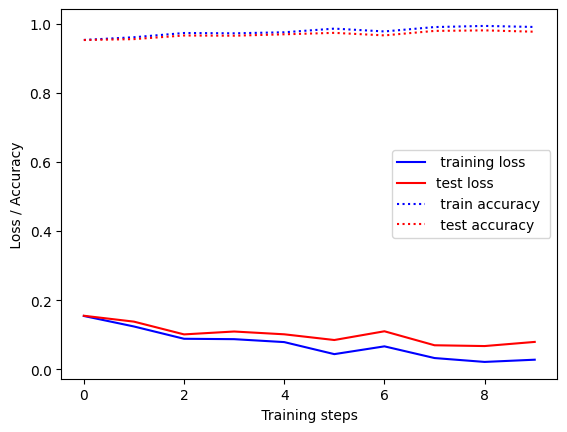

In [22]:
visualization ( train_losses , train_accuracies , test_losses , test_accuracies)